In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv("file.csv")
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [7]:
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [8]:
df.count() #number if non null values in each column


Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [9]:
df_new = df.head()
df_new                     #print first 5 tables

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


# Outlier removal from first 5 data

In [10]:
percentile_99 = df_new.Deaths.quantile(0.99)
percentile_5 = df_new.Deaths.quantile(0.05)

df_new[df_new.Deaths>percentile_99 ]  # death greater than 99th percentile


,Date,State,Region,Confirmed,Deaths,Recovered
2,4/29/2020,NaN,Algeria,3848,444,1702


In [11]:
df_no_outlier = df_new[df_new.Deaths<=percentile_99]
df_no_outlier
#table after removing outlier


,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [12]:
#percentile_5 = df_new.Deaths.quantile(0.05)
#df_new[df_new.Deaths<percentile_5] 


## Pie chart,histgrams,bar graph from first 5 data

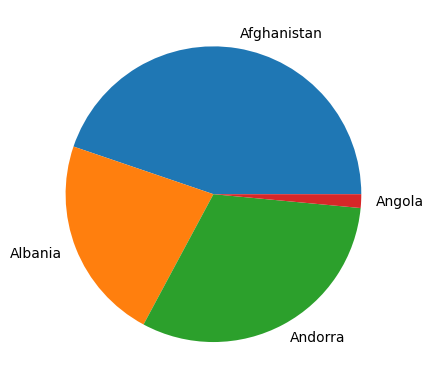

In [13]:
#Pie Chart
plt.pie(df_no_outlier.Deaths,labels=df_no_outlier.Region)
plt.show()

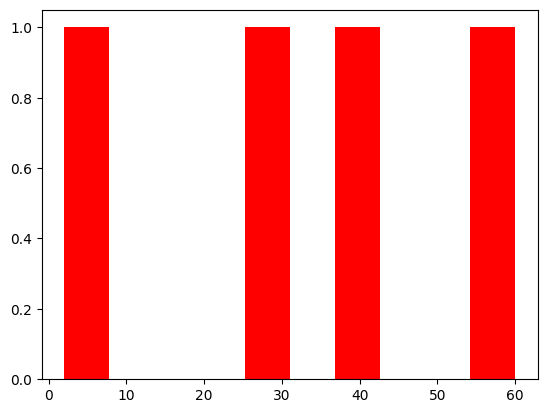

In [14]:
#Histogram
plt.hist(df_no_outlier.Deaths,bins=10,color='r')
plt.show()



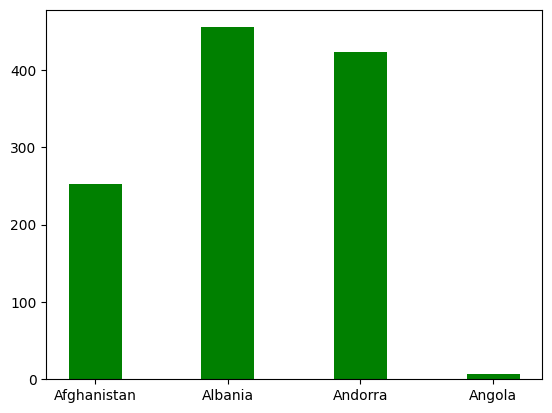

In [15]:
#Bar Graph
plt.bar(df_no_outlier.Region,df_no_outlier.Recovered,width=0.4,color='g')
plt.show()


In [16]:
df_new

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [17]:
#Standard deviation
a=np.std(df_new.Confirmed)
b=np.std(df_new.Deaths)
c=np.std(df_new.Recovered)
print(a)
print(b)
print(c)
#print(a, b ,c)


1340.2308159417914
165.27988383345382
588.9527655084064


# Normal distribution to remove outlier:
## Any data point greater than 3SD or -3SD can be treated as outlier in large data set.

In [18]:
df = pd.read_csv("file.csv")
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [19]:
df.shape
# rows and columns before removing outlier

(321, 6)

In [20]:
mean=df.Deaths.mean()
mean

709.1526479750779

In [21]:
sd=df.Deaths.std()
sd

3236.1628172498954

In [22]:
mean - 3*sd


-8999.33580377461

In [23]:
mean + 3*sd

10417.641099724764

In [24]:
df[(df.Deaths>19416.97)|(df.Deaths < -8999.33)] #this will list outliers data

,Date,State,Region,Confirmed,Deaths,Recovered
57,4/29/2020,NaN,France,165093,24087,48228
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929
168,4/29/2020,NaN,UK,165221,26097,0
265,4/29/2020,New York,US,299691,23477,0


In [25]:
no_outlier=df[(df.Deaths<19416.97)&(df.Deaths >-8999.33)]
no_outlier


,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [26]:
no_outlier.shape  # rows and columns after removing outliers

(316, 6)

# Z score to remove outlier


### Z score: how many sd away a data point is from mean

In [27]:
df['zscore'] = ((df.Deaths - df.Deaths.mean())/df.Deaths.std())   
#df['z score']
df[(df.zscore<-3)|(df.zscore>3)]  # this will print outliers


,Date,State,Region,Confirmed,Deaths,Recovered,zscore
57,4/29/2020,NaN,France,165093,24087,48228,7.223940
80,4/29/2020,NaN,Italy,203591,27682,71252,8.334824
153,4/29/2020,NaN,Spain,236899,24275,132929,7.282034
168,4/29/2020,NaN,UK,165221,26097,0,7.845046
265,4/29/2020,New York,US,299691,23477,0,7.035446


In [28]:
no_outliers=df[(df.zscore>-3)& (df.zscore<3)]
no_outliers

,Date,State,Region,Confirmed,Deaths,Recovered,zscore
0,4/29/2020,NaN,Afghanistan,1939,60,252,-0.200593
1,4/29/2020,NaN,Albania,766,30,455,-0.209864
2,4/29/2020,NaN,Algeria,3848,444,1702,-0.081934
3,4/29/2020,NaN,Andorra,743,42,423,-0.206155
4,4/29/2020,NaN,Angola,27,2,7,-0.218516
...,...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0,-0.216971
317,4/29/2020,Xinjiang,Mainland China,76,3,73,-0.218207
318,4/29/2020,Yukon,Canada,11,0,0,-0.219134
319,4/29/2020,Yunnan,Mainland China,185,2,181,-0.218516


# Modified Z score to remove outlier(more accurate):

In [30]:
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD
    
MAD = get_mad(df.Deaths)
median = np.median(df.Deaths)
MAD, median

(12.0, 12.0)

In [35]:
def get_modified_z_score(x, median, MAD):
    return 0.6745*(x-median)/MAD
    
df['mod_z_score'] = df.Deaths.apply(lambda x: get_modified_z_score(x, median, MAD)) #will add new columns mod_z_score
df


,Date,State,Region,Confirmed,Deaths,Recovered,zscore,mod_z_score
0,4/29/2020,NaN,Afghanistan,1939,60,252,-0.200593,2.698000
1,4/29/2020,NaN,Albania,766,30,455,-0.209864,1.011750
2,4/29/2020,NaN,Algeria,3848,444,1702,-0.081934,24.282000
3,4/29/2020,NaN,Andorra,743,42,423,-0.206155,1.686250
4,4/29/2020,NaN,Angola,27,2,7,-0.218516,-0.562083
...,...,...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0,-0.216971,-0.281042
317,4/29/2020,Xinjiang,Mainland China,76,3,73,-0.218207,-0.505875
318,4/29/2020,Yukon,Canada,11,0,0,-0.219134,-0.674500
319,4/29/2020,Yunnan,Mainland China,185,2,181,-0.218516,-0.562083


In [36]:
df[df.mod_z_score>3.5]  # mod z score more than 3.5 is considered as outlier

,Date,State,Region,Confirmed,Deaths,Recovered,zscore,mod_z_score
2,4/29/2020,NaN,Algeria,3848,444,1702,-0.081934,24.282000
6,4/29/2020,NaN,Argentina,4285,214,1192,-0.153006,11.354083
8,4/29/2020,NaN,Austria,15402,580,12779,-0.039909,31.926333
12,4/29/2020,NaN,Bangladesh,7103,163,150,-0.168766,8.487458
14,4/29/2020,NaN,Belarus,13181,84,2072,-0.193177,4.047000
...,...,...,...,...,...,...,...,...
302,4/29/2020,Tennessee,US,10366,195,0,-0.158877,10.286125
303,4/29/2020,Texas,US,27257,754,0,0.013858,41.706583
311,4/29/2020,Virginia,US,14962,522,0,-0.057832,28.666250
312,4/29/2020,Washington,US,14070,801,0,0.028382,44.348375
